**-> title: Individual Planning Report — Data Science Project**

**-> author: Khush Shah**

**-> student_id: 39772439**

Project: Predicting Usage of a Video Game Research Server  
**Question 1:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?


**1. Data Description**

This project uses two datasets obtained from a UBC research Minecraft server. 

1. **players.csv** - contains information about each unique player, including demographic and behavioral data.
2. **sessions.csv** — contains information about individual play sessions for each player.

For our invesigation, we have chosen to use only the players dataset, but could add the other data set later.

The sessions data was not used because it provides detailed session-level information that isn’t necessary for this stage of analysis. The player-level data already captures the key behavioural metrics needed to address the research question.

**Players Dataset Summary**

This dataset has 7 columns and 196 rows as determined by the code cell below. 
The columns are described and summarized below. 

| Column Name            | Data Type         | Description                                                         |
|-----------------------|------------------|--------------------------------------------------------------------|
| player_id             | Categorical (ID) | Unique identifier for each player                                  |
| age                   | Numeric          | Age of the player in years                                         |
| country               | Categorical      | Country of origin of the player                                    |
| gender                | Categorical      | Gender of the player (if provided)                                 |
| played_hours        | Numeric          | Total hours spent playing on the server                            |
| num_sessions          | Numeric          | Total number of sessions recorded for that player                  |
| subscribe | Logical   | TRUE if player subscribed to the game-related newsletter, FALSE otherwise |

**Data Summary Calculated**

Below is the data for the summary statistics calculated using the the code in the cell below. The values are rounded to 2 decimal places. 

| played_hours_mean| played_hours_sd	| played_hours_min	| played_hours_max  | Age_mean     | Age_sd   | Age_min | Age_max    | 
|------------------|--------------------|-------------------|------------------|-------------|---------|--------|-----------|
| 5.85             | 28.36               | 0	            | 223.1            | 21.14       | 7.39    | 9      | 58        |

**Data issues observed (directly visible)**

1. **Missing values:** Some numeric variables (like "age") contain "NA"s. These will require imputation or explicit handling.
2. **Outliers:** Max values for "played_hours" are substantially larger than the mean; these extreme values suggest they may be outliers which affect modeling.

**Potential issues you cannot see directly (hidden)**

1. **Sampling bias:** Players present in the dataset are only those who logged into the server — they may not represent the entire intended population. For example, people who tried once then never returned are underrepresented.
2. **Measurement error:** "played_hours" may be aggregated differently, or may include idle time if the server doesn't strictly record active play.

**Data collection notes**

1. Data were collected from server logs and registration records for the research Minecraft server.
2. Demographic data (age, gender) likely come from optional registration fields or post-registration surveys; the accuracy depends on self-reporting.

**Conclusion:** The dataset is good enough for an initial descriptive analysis and for modeling a binary outcome (newsletter subscription). However, we must be careful with missing values, outliers, and potential bias when interpreting predictive results.

In [1]:
library(dplyr)
library(readr)

players <- read_csv("https://raw.githubusercontent.com/KPS-KV/project-009-45/refs/heads/main/players.csv") 

ncol(players)
nrow(players)

players_summary <- players |> 
  summarise(
    across(
      where(is.numeric),
      list(
        mean = ~round(mean(.x, na.rm = TRUE), 2),
        sd   = ~round(sd(.x, na.rm = TRUE), 2),
        min  = ~round(min(.x, na.rm = TRUE), 2),
        max  = ~round(max(.x, na.rm = TRUE), 2)
      ),
      .names = "{col}_{fn}"
    )
  ) 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 7

[1] 196

**2. Questions**
   
**Broad Question:**
What player characteristics and behaviours are most predictive of subscribing to the game-related newsletter?

**Specific Question:**
Can **player age** and **played_hours** together predict the likelihood of subscribing to the **game-related newsletter**?

**Explanation of Data Relevance:**
The players.csv dataset contains individual-level attributes such as:
1. **Demographics**: for example, "age".
2. **Behavioural features**: for example, "played_hours".
3. **Response variable**: "newsletter_subscribed" (TRUE = subscribed, FALSE = not subscribed)

These variables directly support the analysis of whether certain **player demographics and behaviours** influence newsletter subscription likelihood.

To prepare the data for analysis, we will:
1. Convert "newsletter_subscribed" to a factor variable (categorical outcome).  
2. Ensure "Age" and "played_hours" are numeric variables.  
3. Filter out rows with missing values or impossible values like negative played hours.  
4. I could also **optionally** add "sessions.csv" in future steps to validate playtime totals or add session-based features.


**3. Exploratory Data Analysis and Visualization**

The dataset was loaded into R above when I calculated the summary statistics for the data.

This section explores the variables relevant to the research question, visualizing relationships and computing summary statistics to understand data patterns.

The mean values of the quantitative variables in the "players.csv" are shown below, computed from the code cell below this one. 

| played_hours| Age    |
|-------------|--------|
| 5.845918    |21.13918|

I then plotted multiple graphs of different types to first learn about individual variables and then the combined variables and their relationships. 

The observations are summarized below. 

1. The majority of players are between 10–30 years old.
2. Total playtime varies widely, with a few players showing extremely high values (most likely outliers).
3. Younger players tend to have slightly higher total playtime on average. (15-25 year olds have higher play time than 40-60 year olds).
4. Newsletter subscriptions appear more common among players with higher total playtime and moderate age ranges.

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(where(is.numeric), mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


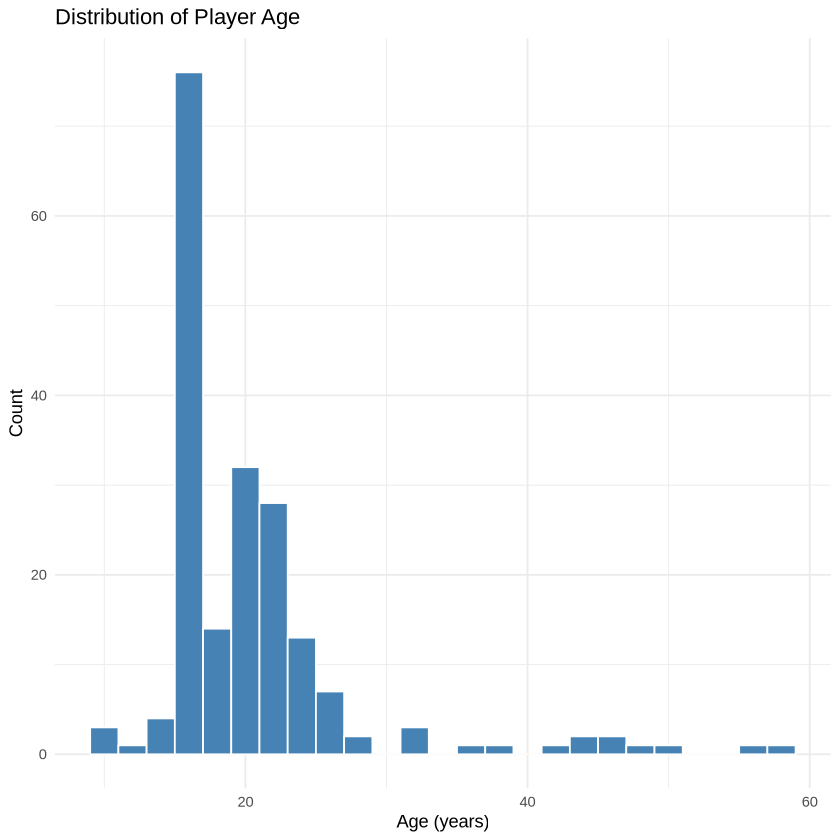

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


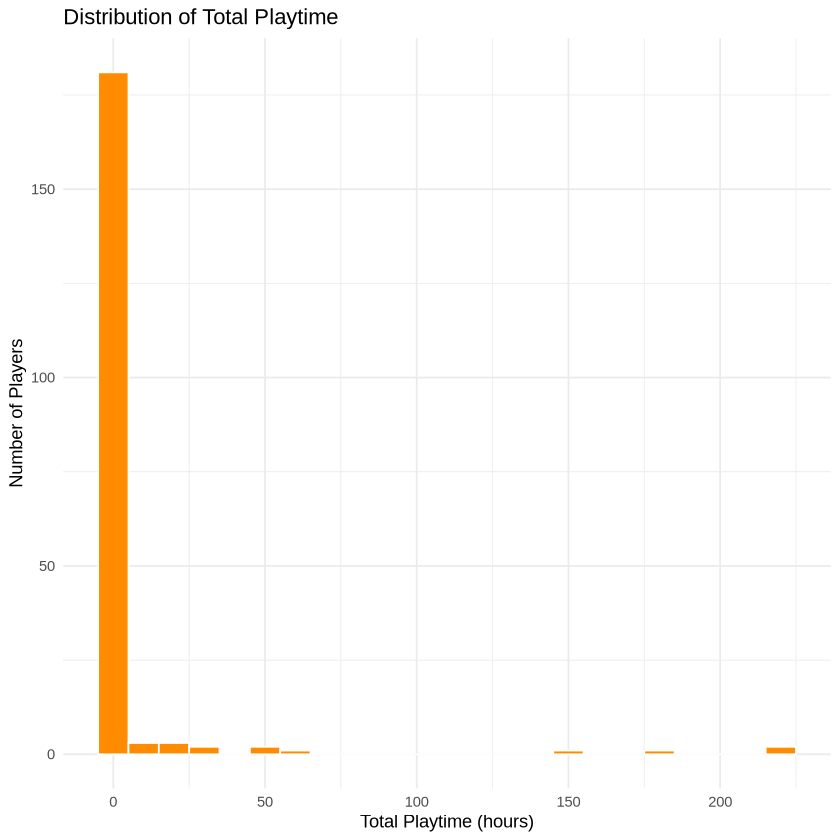

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


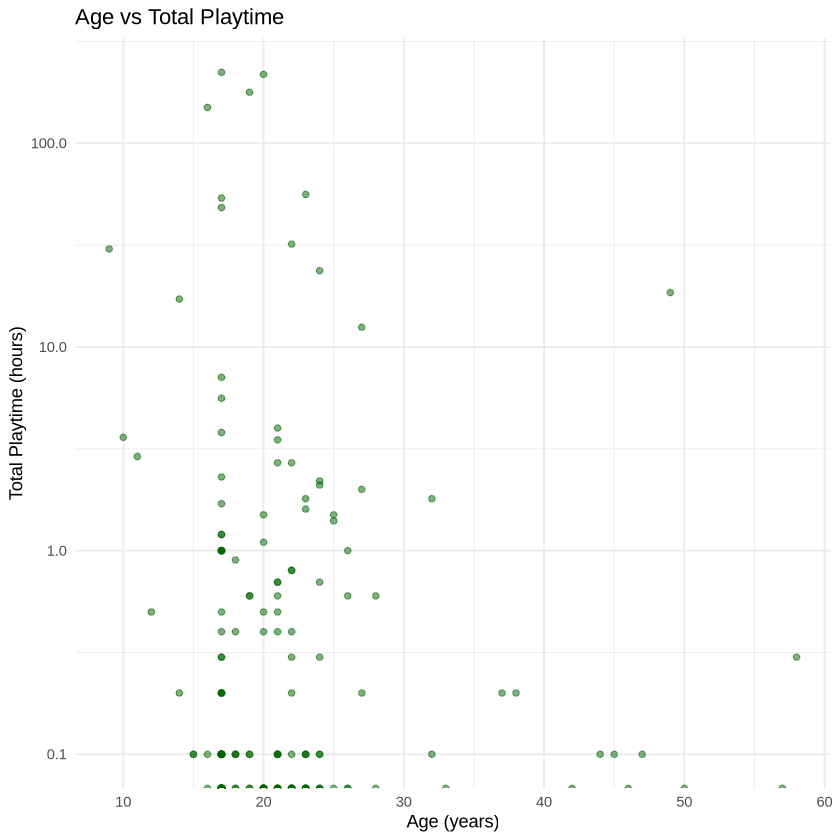

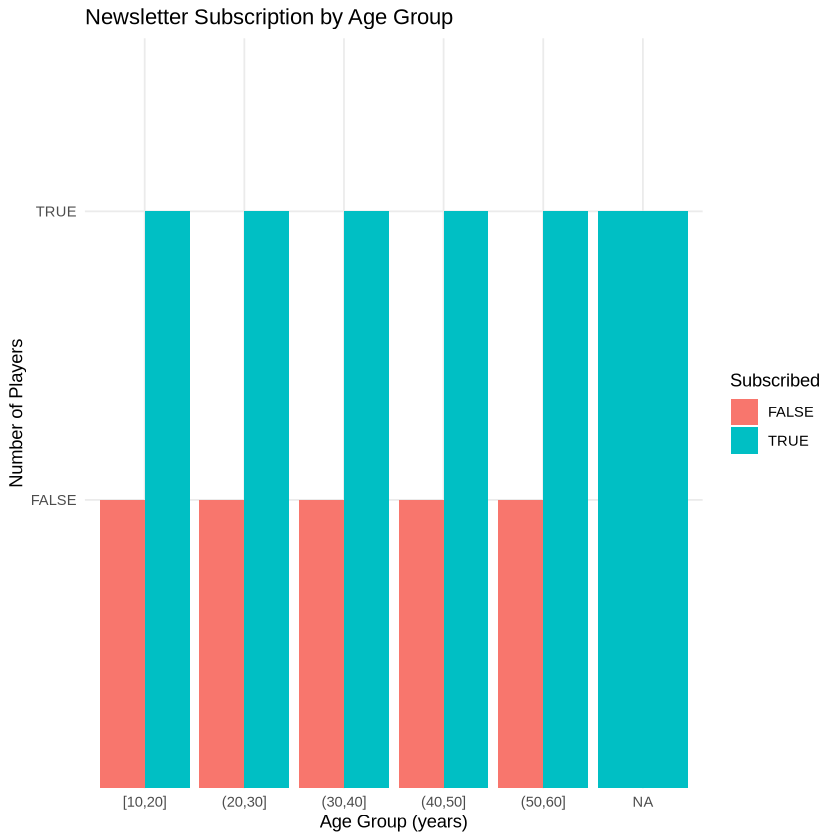

In [2]:
# Mean values for quantitative variables.
players |>
  summarise(across(where(is.numeric), mean, na.rm = TRUE))

# VISUALIZATIONS

#Distribution of player age will help see how many players of different ages play the game.

library(ggplot2)

ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Count"
  ) +
  theme_minimal()

#Distribution of played hours will help see the duration for which different players play Minecraft.

ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "darkorange", color = "white") +
  labs(
    title = "Distribution of Total Playtime",
    x = "Total Playtime (hours)",
    y = "Number of Players"
  ) +
  theme_minimal()

#Relationship between age and played hours helps visualize for how long different age groups play the game

ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5, color = "darkgreen") +
scale_y_log10() +
  labs(
    title = "Age vs Total Playtime",
    x = "Age (years)",
    y = "Total Playtime (hours)"
  ) +
  theme_minimal()

#This shows whether different age groups have subscribed or not.
#First I created new age groups and then plotted a bar graph to visualize the relationship. 

players |>
mutate(age_group = cut(Age, breaks = c(10,20,30,40,50,60), include.lowest = TRUE)) |>
group_by(age_group, subscribe) |>
summarise(count = n()) |>

ggplot(aes(x = age_group, y = subscribe, fill = as.factor(subscribe))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Newsletter Subscription by Age Group",
    x = "Age Group (years)",
    y = "Number of Players",
    fill = "Subscribed"
  ) +
  theme_minimal()

**4. Methods and Plan**

I will use logistic regression to predict the probability of newsletter subscription (subscribe) using age and played_hours as predictors.

**Why This Method**
1. Suitable for a binary outcome variable.
2. Provides interpretable coefficients showing how predictors affect subscription likelihood.
3. Widely used and reliable for classification tasks.

**Assumptions**
1. Independent observations.
2. Linear relationship between predictors and log-odds.
3. No strong multicollinearity.
4. Adequate/ Sufficient sample size.

**Limitations**
1. Sensitive to outliers and skewed predictors.
2. May not capture nonlinear or interaction effects.

**Model Evaluation Plan**

1. Split data into 70% training / 30% testing, using 5-fold cross-validation for reliability.

**5. GitHub Repository**

This project can be accessed in the following repository:

**GitHub Repository: https://github.com/KPS-KV/project-009-45.git**

The commit summary is provided below. I made 8 commits (including the initial commit). 

| Commit |Description in Github |
|--------|-----------------------|
| 1      | Initial commit   | 
| 2      | Created the notebook and did basic steps|
| 3      | Commit 2: Added a basic plan (should be 3, its a typo)|
| 4      | Added the description section of the report|
| 5      | Added research question, broad and specific question statements, and explanation of data relevance.|
| 6      | Added exploratory data analysis and visualization section with descriptive plots, removed unnecessary information. |
| 7      | Added proposed method, justification, assumptions, and data processing plan as well as minor changes to previous cells. |
| 8      | Added GitHub repository link and final notes |